In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df=pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

In [4]:
len(df['CustomerID'].unique())

4373

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.shape

(541909, 8)

In [8]:
df=df.dropna()
df.shape

(406829, 8)

In [9]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
df['Quantity'].unique().sum()

125917

In [11]:
df = df[(df['Quantity']>0)]

In [12]:
df['Quantity'].unique().sum()

324607

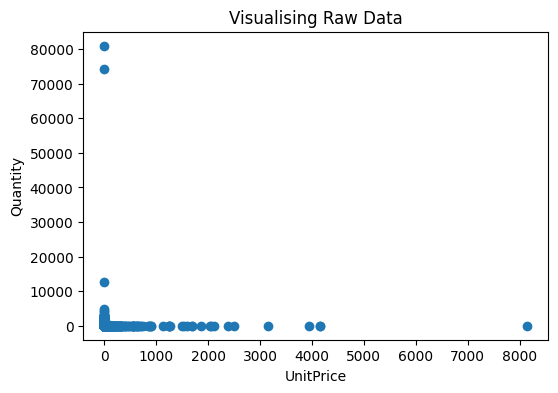

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(df['UnitPrice'],df['Quantity'])
plt.xlabel("UnitPrice")
plt.ylabel("Quantity")
plt.title("Visualising Raw Data")
plt.show()

In [14]:
df['Amount'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
rfm_m = df.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
print(rfm_m.head())
rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
print(rfm_f.head())

   CustomerID    Amount
0     12346.0  77183.60
1     12347.0   4310.00
2     12348.0   1797.24
3     12349.0   1757.55
4     12350.0    334.40
   CustomerID  Frequency
0     12346.0          1
1     12347.0        182
2     12348.0         31
3     12349.0         73
4     12350.0         17


In [16]:
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [17]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [18]:
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [19]:
df['Difference'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [20]:
rfm_p = df.groupby('CustomerID')['Difference'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Difference
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [21]:
rfm_p['Difference'] = rfm_p['Difference'].dt.days
rfm_p.head()

,CustomerID,Difference
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [22]:
rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')

In [23]:
rfm.head()

,CustomerID,Amount,Frequency,Difference
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [24]:
len(df['CustomerID'].unique())

4339

In [25]:
rfm_c = df.groupby('CustomerID')['Country'].unique()
rfm_c = rfm_c.reset_index()
rfm_c.columns=['CustomerID','Country']
rfm_c.head()

,CustomerID,Country
0,12346.0,[United Kingdom]
1,12347.0,[Iceland]
2,12348.0,[Finland]
3,12349.0,[Italy]
4,12350.0,[Norway]


In [26]:
rfm = pd.merge(rfm, rfm_c, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency,Difference,Country
0,12346.0,77183.60,1,325,[United Kingdom]
1,12347.0,4310.00,182,1,[Iceland]
2,12348.0,1797.24,31,74,[Finland]
3,12349.0,1757.55,73,18,[Italy]
4,12350.0,334.40,17,309,[Norway]


In [27]:
rfm_n = df.groupby('CustomerID')['Quantity'].count()
rfm_n = rfm_n.reset_index()
rfm_n.columns=['CustomerID','TotalQuantity']
rfm_n.head()

,CustomerID,TotalQuantity
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [28]:
rfm = pd.merge(rfm, rfm_n, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency,Difference,Country,TotalQuantity
0,12346.0,77183.60,1,325,[United Kingdom],1
1,12347.0,4310.00,182,1,[Iceland],182
2,12348.0,1797.24,31,74,[Finland],31
3,12349.0,1757.55,73,18,[Italy],73
4,12350.0,334.40,17,309,[Norway],17


In [29]:
rfm['Country1']='India'

In [30]:
rfm.head()

,CustomerID,Amount,Frequency,Difference,Country,TotalQuantity,Country1
0,12346.0,77183.60,1,325,[United Kingdom],1,India
1,12347.0,4310.00,182,1,[Iceland],182,India
2,12348.0,1797.24,31,74,[Finland],31,India
3,12349.0,1757.55,73,18,[Italy],73,India
4,12350.0,334.40,17,309,[Norway],17,India


In [31]:
for i in range (len(rfm)):
    rfm['Country1'][i]=rfm['Country'][i][0]

/tmp/ipykernel_64039/1098564235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Country1'][i]=rfm['Country'][i][0]


In [32]:
rfm=rfm.drop(['Country'],axis=1)

In [33]:
rfm=rfm.rename(columns={'Country1':'Country'})
rfm.head()

,CustomerID,Amount,Frequency,Difference,TotalQuantity,Country
0,12346.0,77183.60,1,325,1,United Kingdom
1,12347.0,4310.00,182,1,182,Iceland
2,12348.0,1797.24,31,74,31,Finland
3,12349.0,1757.55,73,18,73,Italy
4,12350.0,334.40,17,309,17,Norway


In [34]:
rfm=pd.get_dummies(rfm,columns=['Country'])

In [35]:
pd.set_option('display.max_columns', None)
rfm.head()

,CustomerID,Amount,Frequency,Difference,TotalQuantity,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,Country_Cyprus,Country_Czech Republic,Country_Denmark,Country_EIRE,Country_European Community,Country_Finland,Country_France,Country_Germany,Country_Greece,Country_Iceland,Country_Israel,Country_Italy,Country_Japan,Country_Lebanon,Country_Lithuania,Country_Malta,Country_Netherlands,Country_Norway,Country_Poland,Country_Portugal,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,12346.0,77183.60,1,325,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,12347.0,4310.00,182,1,182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,12348.0,1797.24,31,74,31,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,12349.0,1757.55,73,18,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12350.0,334.40,17,309,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
rfm1=rfm.copy()

In [37]:
rfm1=rfm.iloc[:,1:5]
rfm1.shape

(4339, 4)

In [38]:
df_s=StandardScaler().fit_transform(rfm1)
df_s=pd.DataFrame(df_s)
df_s.columns=['Amount','Frequency','Difference','TQ']

In [39]:
df_s.head()

,Amount,Frequency,Difference,TQ
0,8.359634,-0.396512,2.334858,-0.396512
1,0.251046,0.394688,-0.905199,0.394688
2,-0.028546,-0.265374,-0.175186,-0.265374
3,-0.032963,-0.081781,-0.735196,-0.081781
4,-0.191315,-0.326572,2.174855,-0.326572


In [40]:
pca=PCA(n_components=0.85)
pca.fit(df_s)

PCA(n_components=0.85)

In [41]:
pca.explained_variance_ratio_

array([0.58813681, 0.2317703 , 0.1800929 ])

In [42]:
scores=pca.transform(df_s)

In [43]:
wcss=[]
for i in range(1,21):
    kmeans_pca=KMeans(n_clusters=i,init='k-means++',random_state=2)
    kmeans_pca.fit(scores)
    wcss.append(kmeans_pca.inertia_)

In [44]:
print(wcss)

[17355.99999999999, 11655.41927131754, 8029.889645383956, 5638.423018513309, 3883.61413468935, 3185.515632308365, 2741.0993046483172, 2311.650039716095, 1996.855011161163, 1749.7840692717027, 1544.7963116749402, 1377.2472194839477, 1224.813554492937, 1127.9812465586376, 998.0471889926863, 912.5141213713295, 824.9056913690711, 749.6924301667048, 696.2907486948703, 648.7817080498111]


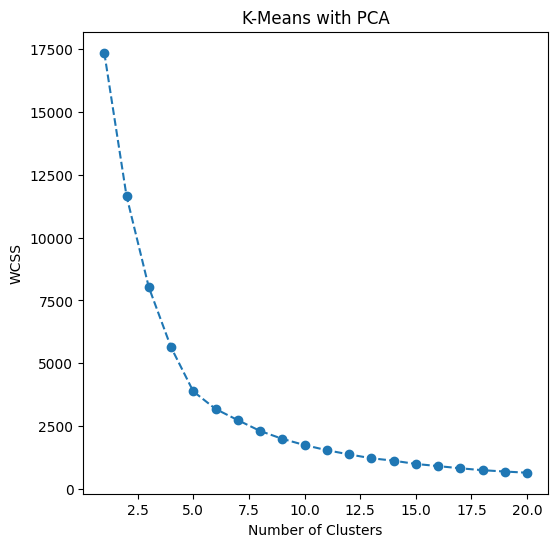

In [45]:
plt.figure(figsize=(6,6))
plt.plot(range(1,21),wcss,marker='o',linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-Means with PCA")
plt.show()

In [46]:
kmeans_pca=KMeans(n_clusters=4,init='k-means++',random_state=42)
kmeans_pca.fit(scores)


KMeans(n_clusters=4, random_state=42)

In [47]:
label=kmeans_pca.fit_predict(scores)
label

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [48]:
rfm=pd.concat([rfm.reset_index(drop=True),pd.DataFrame(scores)],axis=1)

In [49]:
rfm.columns.values[-3:]=['Component1','Component2','Component3']
rfm['label']=kmeans_pca.labels_
rfm.head()


,CustomerID,Amount,Frequency,Difference,TotalQuantity,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,Country_Channel Islands,Country_Cyprus,Country_Czech Republic,Country_Denmark,Country_EIRE,Country_European Community,Country_Finland,Country_France,Country_Germany,Country_Greece,Country_Iceland,Country_Israel,Country_Italy,Country_Japan,Country_Lebanon,Country_Lithuania,Country_Malta,Country_Netherlands,Country_Norway,Country_Poland,Country_Portugal,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified,Component1,Component2,Component3,label
0,12346.0,77183.60,1,325,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2.405249,3.425321,7.624398,0
1,12347.0,4310.00,182,1,182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.801699,-0.741525,0.037226,1
2,12348.0,1797.24,31,74,31,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.303328,-0.242246,0.147176,1
3,12349.0,1757.55,73,18,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.051428,-0.740459,0.063655,1
4,12350.0,334.40,17,309,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-0.980678,2.002049,-0.099845,3


In [50]:
rfm['label'].value_counts()

1    3229
3    1091
0      15
2       4
Name: label, dtype: int64

In [51]:
u_l=np.unique(label)
print(u_l)

[0 1 2 3]


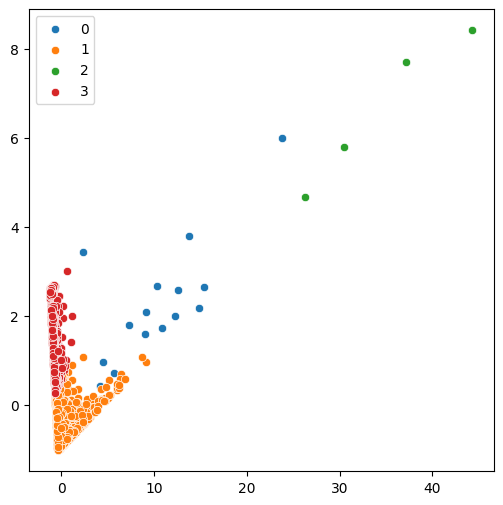

In [52]:
#scatter plot to know which point belongs to which cluster
plt.figure(figsize=(6,6))
for i in u_l:
    sns.scatterplot(x=scores[label == i , 0] , y=scores[label == i , 1] , label = i)
plt.legend()
plt.show()

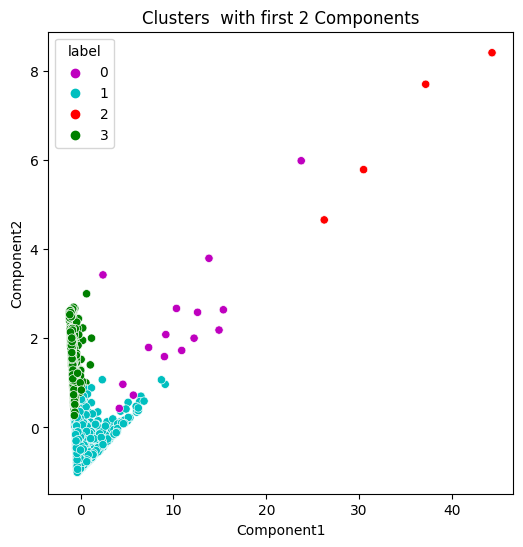

In [53]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=rfm['Component1'],y=rfm['Component2'],hue=rfm['label'],palette=['m','c','r','g'])
plt.xlabel("Component1")
plt.ylabel("Component2")
plt.title("Clusters  with first 2 Components")
plt.show()